# Description: example
## framework: pytorch

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

# Selection

In [25]:
# settings
source = './mnist.csv'
split_train, split_test, split_validation = 60, 20, 20
label_colname = 'label'

In [26]:
data = pd.read_csv(source, encoding='utf_8', parse_dates=True)

In [27]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X,y = data.drop([label_colname], axis = 1), data[label_colname]

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = split_train / 100, test_size = split_test / 100, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=(100 - split_validation) / 100)

# Preprocessing

In [1]:
X_train = X_train / 255.
X_test = X_test / 255.

NameError: name 'X_train' is not defined

# Transformation

In [35]:
# TODO

# Data mining

In [36]:
import keras.models as km
from keras.layers as kl

In [37]:
def Network(nbIn,nbOut):
    model = km.Sequential()
    model.add(kl.Dense(int(nbIn/2), activation='tanh', input_shape=(nbIn,)))
    model.add(kl.Dense(nbOut, activation='softmax'))
    return model

In [39]:
nbIn = input_data.shape[1]
nbOut = 1
nbHidden = int(nbIn/2)

neuralNetwork = Network(nbIn,nbOut)
neuralNetwork

Network(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=392, bias=True)
    (1): Tanh()
    (2): Linear(in_features=392, out_features=1, bias=True)
  )
)

#### Loss/optimizers catalog

In [54]:
supported_loss_functions = {
    'mse': nn.MSELoss,
    'cross_entropy': nn.CrossEntropyLoss,
}
supported_optimizers = {
    'adam': torch.optim.Adam,
    'sgd': torch.optim.SGD,
}

In [58]:
selected_loss_function = 'mse'
selected_optimizer = 'sgd'
learning_rate = 0.003
nbEpochs = 100

In [59]:
criterion = supported_loss_functions[selected_loss_function]()
optimizer = supported_optimizers[selected_optimizer](neuralNetwork.parameters(), lr=learning_rate)

In [60]:
items = []
# launching iterations
for epoch in range(nbEpochs):
    optimizer.zero_grad()
    output = neuralNetwork(input_data)
    loss = criterion(output, target) # calcul de la fonction cout (moindres carrés)
    loss.backward() # calcul du gradient (sens = droite vers gauche)
    optimizer.step() # modification des parametres du réseau de neurones
    print(loss.item())
    items.append(loss.item())

30.501522064208984
19.273681640625
8.698606491088867
6.246184349060059
5.728732109069824
5.342290878295898
5.019049644470215
4.7505106925964355
4.527957916259766
4.340573787689209
4.182560920715332
4.049341678619385
3.934431791305542
3.833437442779541
3.7450685501098633
3.667301893234253
3.5955910682678223
3.5298588275909424
3.4695558547973633
3.4131081104278564
3.363330125808716
3.3217127323150635
3.2884392738342285
3.2632408142089844
3.2464652061462402
3.224344253540039
3.209027051925659
3.1857552528381348
3.166302442550659
3.151869058609009
3.138343572616577
3.125075340270996
3.1104934215545654
3.1018149852752686
3.0866920948028564
3.084139347076416
3.0679914951324463
3.0714735984802246
3.06174373626709
3.0615463256835938
3.0471200942993164
3.0450031757354736
3.028083562850952
3.0249855518341064
3.0009076595306396
2.985039472579956
2.9435670375823975
2.9124884605407715
2.8481268882751465
2.7854020595550537
2.704533100128174
2.6409835815429688
2.5752859115600586
2.5273079872131348
2.

# Validation

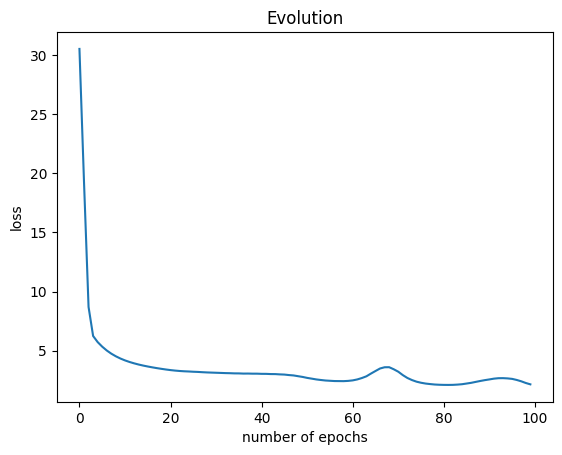

In [62]:
fig, ax = plt.subplots()
x = np.arange(len(items))
ax.plot(x, items)
ax.set(xlabel='number of epochs', ylabel='loss', title='Evolution')
plt.show()

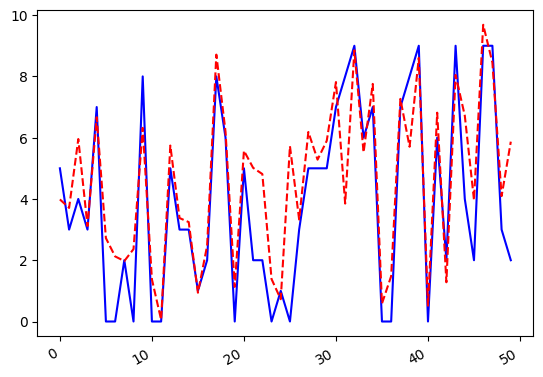

In [77]:
ax = plt.gca()
plt.plot(np.arange(y_train.values[:50].size), y_train.values[:50], '-', label='True data', color='b')
plt.plot(np.arange(output.detach().numpy()[:50].size), output.detach().numpy()[:50], '--', label='Predictions', color='r')
plt.gcf().autofmt_xdate()
plt.show()

# Knowledge

The conclusion